In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan.plots import plot_sky, plot_airmass
from astroplan import Observer, FixedTarget, time_grid_from_range, observability_table, moon_illumination
from astroplan import AirmassConstraint, MoonSeparationConstraint

In [7]:
apache = Observer(longitude = 105.8202778 * u.deg,
                    latitude = 32.78027778 * u.deg,
                    timezone = 'US/Mountain',
                    name = 'Apache Point')

In [19]:
target = [FixedTarget(coord=SkyCoord(ra = 0.712313889*u.hourangle, dec = 41.26875*u.deg), name='M31')]

In [20]:
target

[<FixedTarget "M31" at SkyCoord (ICRS): (ra, dec) in deg ( 10.68470833,  41.26875)>]

In [44]:
reference_time = Time("2018-03-31 12:00:00")
end_time = Time("2018-04-01 12:00:00")

twilight_apache = apache.twilight_evening_astronomical(reference_time, which='nearest')
twilight_end_apache = apache.twilight_morning_astronomical(reference_time, which='next')
apache_observing_length = (twilight_end_apache - twilight_apache).to(u.h)
apache_observing_length


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


<Quantity 8.71007925644517 h>

In [70]:
reference12_time = Time("2018-12-31 12:00:00")
end12_time = Time("2019-01-01 12:00:00")

window_range = [reference12_time, end12_time]
window_time_grid = time_grid_from_range(window_range)

twilight_12apache = apache.twilight_evening_astronomical(reference12_time, which='nearest')
twilight_end_12apache = apache.twilight_morning_astronomical(reference12_time, which='next')
apache_12observing_length = (twilight_end_12apache - twilight_12apache).to(u.h)
print(apache_12observing_length)

apache.moon_phase(reference12_time) #phase = 2*pi is new moon. phase = 0 is full


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


11.044439010322096 h


<Quantity 2.0217873668494173 rad>

In [65]:
apache_observing_range = [twilight_12apache, twilight_end_12apache]
apache_observing_range
print(apache_observing_range[0])

2458483.9780593943


In [66]:
constraints = [AirmassConstraint(2), MoonSeparationConstraint(35*u.deg)]

apache_observing_table = observability_table(constraints, apache, target, time_range=apache_observing_range)

print(apache_observing_table) #Passes moon separation constraint. 

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
        M31            True             False              0.434782608696


2018-12-31 11:28:24.331666
2018-12-31 22:31:04.312103
You can observe M31 for 3.79 h


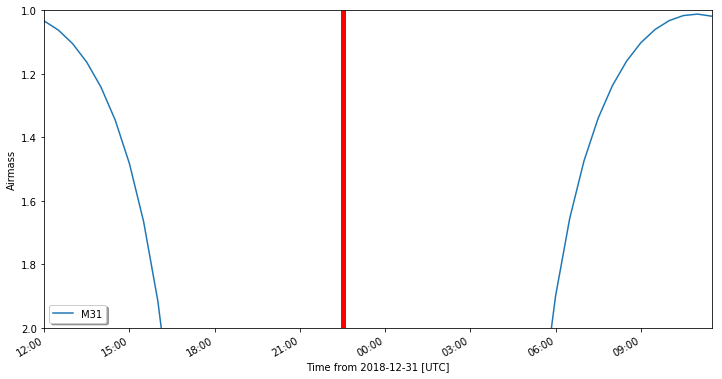

In [67]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

print(twilight_12apache.datetime)
print(twilight_end_12apache.datetime)

for i, my_object in enumerate(target):

    if apache_observing_table['ever observable'][i]:  # Sees true or false
        ax = plot_airmass(my_object, apache, window_time_grid, max_airmass=2.0)
        name = apache_observing_table['target name'][i]
        obj_frac = apache_observing_table['fraction of time observable'][i]
        obj_time = obj_frac * apache_observing_length
        output = "You can observe {0:s} for {1:.2f}".format(name, obj_time.to(u.h))
        print(output)

ax.vlines(twilight_12apache.datetime, 1,3, color='r', linewidth=5)
ax.vlines(twilight_end_12apache.datetime, 1,3, color='r', linewidth=5)

ax.legend(loc=0,shadow=True);

# Planetary Nebula

In [74]:
ctio = Observer(longitude = 70.804 * u.deg,
                    latitude = -30.169 * u.deg,
                    timezone = 'Etc/GMT+3',
                    name = 'CTIO')

In [84]:
ic418 = [FixedTarget(coord=SkyCoord(ra = 5.45783436*u.hourangle, dec = -12.68811111*u.deg), name='IC 418')]

In [77]:
ctioreference_time = Time("2018-03-31 12:00:00")
ctioend_time = Time("2018-04-01 12:00:00")

twilight_ctio = ctio.twilight_evening_astronomical(ctioreference_time, which='nearest')
twilight_end_ctio = ctio.twilight_morning_astronomical(ctioreference_time, which='next')
ctio_observing_length = (twilight_end_ctio - twilight_ctio).to(u.h)
ctio_observing_length


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


<Quantity 9.557093549519777 h>

In [83]:
ctioreference12_time = Time("2018-12-31 12:00:00")
ctioend12_time = Time("2019-01-01 12:00:00")

window_range = [ctioreference12_time, ctioend12_time]
window_time_grid = time_grid_from_range(window_range)

twilight_12ctio = apache.twilight_evening_astronomical(ctioreference12_time, which='nearest')
twilight_end_12ctio = apache.twilight_morning_astronomical(ctioreference12_time, which='next')
ctio_12observing_length = (twilight_end_12ctio - twilight_12ctio).to(u.h)
print(ctio_12observing_length)

ctio.moon_phase(ctioreference12_time) #phase = 2*pi is new moon. phase = 0 is full


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


11.044439010322096 h


<Quantity 2.0217873668494173 rad>

In [81]:
ctio_observing_range = [twilight_12ctio, twilight_end_12ctio]
ctio_observing_range
print(ctio_observing_range[0])

2458483.9780593943


In [86]:
constraints = [AirmassConstraint(2), MoonSeparationConstraint(35*u.deg)]

ctio_observing_table = observability_table(constraints, ctio, ic418, time_range=apache_observing_range)

print(ctio_observing_table) #Passes moon separation constraint. 

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
     IC 418            True             False              0.739130434783


2018-12-31 11:28:24.331666
2018-12-31 22:31:04.312103
You can observe IC 418 for 7.06 h


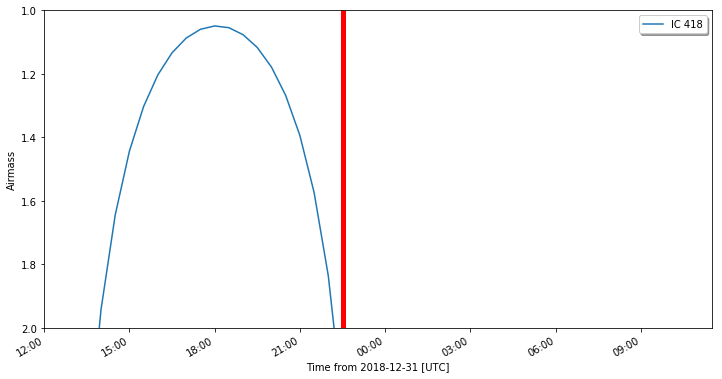

In [87]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

print(twilight_12ctio.datetime)
print(twilight_end_12ctio.datetime)

for i, my_object in enumerate(ic418):

    if ctio_observing_table['ever observable'][i]:  # Sees true or false
        ax = plot_airmass(my_object, ctio, window_time_grid, max_airmass=2.0)
        name = ctio_observing_table['target name'][i]
        obj_frac = ctio_observing_table['fraction of time observable'][i]
        obj_time = obj_frac * ctio_observing_length
        output = "You can observe {0:s} for {1:.2f}".format(name, obj_time.to(u.h))
        print(output)

ax.vlines(twilight_12ctio.datetime, 1,3, color='r', linewidth=5)
ax.vlines(twilight_end_12ctio.datetime, 1,3, color='r', linewidth=5)

ax.legend(loc=0,shadow=True);